# *Experiment 3*

# *Perceptron Network*

In [2]:
# import the required modules
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import csv

In [3]:
class graph:
    
    def __init__(self):
        
        # Set properties of the graph
        plt.axis([-3,3,-3,3])
        plt.grid(True)
        plt.xlabel("X axis")
        plt.ylabel("Y axis")
        plt.title("Linear Separability for current weights")

        # Plot the x and y axis 
        plt.axhline(linewidth = 1, color='black')
        plt.axvline(linewidth = 1, color='black')
    
    def plotpoints(self,training_data,actualop):
        
        # Plot of input values
        # Positive values are red and cross
        # Negative values are blue and circled
        for x in range(4):
            if(actualop[x] > 0):
                plt.plot(training_data[x][0],training_data[x][1],'rx')
            else :
                plt.plot(training_data[x][0],training_data[x][1],'bo')
                
    def draw(self,weights,it,isLast=False):
        
        # Plot the lines for every iteration
        axes = plt.gca()
        x_vals = np.array(axes.get_xlim())
        
        if(weights[1] == 0):
            return None
        
        slope = (-weights[0] / weights[1])
        intercept = (-weights[2] / weights[1])
    
        # iteration number
        s = "{}".format(it)
        
        # y coordinate
        y_vals = intercept + slope * x_vals
        
        if(isLast):
            plt.plot(x_vals, y_vals,color='black', linewidth=2.0)
        else:
            plt.plot(x_vals, y_vals, '--')
            
        # show the iteration number
        plt.text(x_vals[0],y_vals[0],s,fontsize=12)        

    def showandsave(self):
        
        # store the figure
        plt.savefig('./figures/modelplot.png')
        # show the graph
        plt.show()        

In [4]:
class perceptron:
    
    def __init__(self,epochs=1,alpha=1,threshold=0,flag=True,todraw=True):
        
        # number of epochs 
        self.epochs = epochs
        # value of learning rate
        self.alpha = alpha
        # value of threshold
        self.threshold = threshold
        # inputs are bipolar or binary
        self.inptype = flag
        # whether to draw a graph or not
        self.todraw = todraw
    
        # Call the input function to obtain the input values
        self.extract()        
        
        # dont draw if the number of features are more than two 
        checkdraw = lambda num : False if num > 2 else True
        self.todraw = checkdraw(self.no_features)        
        # Initialize the weights and bias as zero
        self.weights = [ 0 for x in range(self.no_features)]
        self.bias = 0
    
    def extract(self):
        
        # read the input from excel file 
        excel_file = './inputs/bipolar-andnot.xlsx'
        # convert it into a pandas dataframe
        dataframe = pd.read_excel(excel_file)
        # find out the number of features
        self.no_features = len(dataframe.columns) - 1
        # find out the number of inputs
        self.no_rows = len(dataframe.index)
        
        # Convert the dataframe into lists for analysis
        self.training_data = [ dataframe.iloc[i,:self.no_features].tolist() for i in range(self.no_rows) ]
        # Obtain the output in a separate list
        self.actual_op = dataframe['y'].tolist()
        
    def activation(self,yin):
        
        # return 1 if greater than threshold
        if(yin > self.threshold):
            return 1
        # return 0 if binary inputs given
        if(self.inptype == False):
            return 0
        # return -1 if less the negative of threshold
        if(yin < -self.threshold):
            return -1
        # otherwise return 0
        return 0
    
    def displayweights(self):
        print(self.weights,self.bias)
        print("---------------------")
        
    def calculate(self):
        
        if(self.todraw):
            g = graph()
            g.plotpoints(self.training_data,self.actual_op)
        
        for i in range(self.epochs):
            for j in range(self.no_rows):
                
                # Obtain the output
                yin = np.sum(np.array(self.training_data[j])*np.array(self.weights)) + self.bias          
                # Obtain the output from the activation function
                yin = self.activation(yin)
                
                # do not update weights if output matches
                if(yin == self.actual_op[j]):
                    continue
                    
                # update the weights and the bias
                self.weights = (np.array(self.weights) + self.alpha*self.actual_op[j]*np.array(self.training_data[j])).tolist()
                self.bias += self.alpha*self.actual_op[j]
                
                # redraw the graph 
                if(self.todraw):
                    g.draw(self.weights+[self.bias],i+j/10)
        
        # redraw the final line 
        if(self.todraw):            
            g.draw(self.weights+[self.bias],i+j/10,True)        
            g.showandsave()

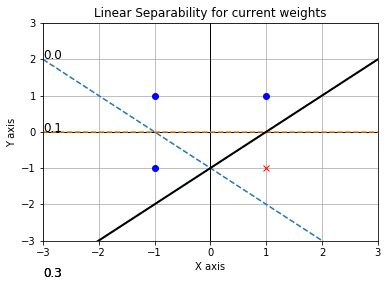

In [5]:
p = perceptron(1)
p.calculate()